1. **Logistic Regression**:
    - **Accuracy**: 95.56%

2. **Decision Tree Classifier**:
    - **Accuracy**: 93.33%

Logistic Regression slightly outperformed the Decision Tree Classifier, indicating it was better suited for this dataset.

In [74]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv("IRIS.csv")

In [76]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [77]:
df.shape

(150, 5)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [79]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [80]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [81]:
df.duplicated().sum()

3

In [82]:
df.drop_duplicates(inplace=True)

In [83]:
df.duplicated().sum()

0

C:\Users\SHIVAM ADHAU\AppData\Local\Temp\ipykernel_6548\2977871247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['species'], palette="viridis")


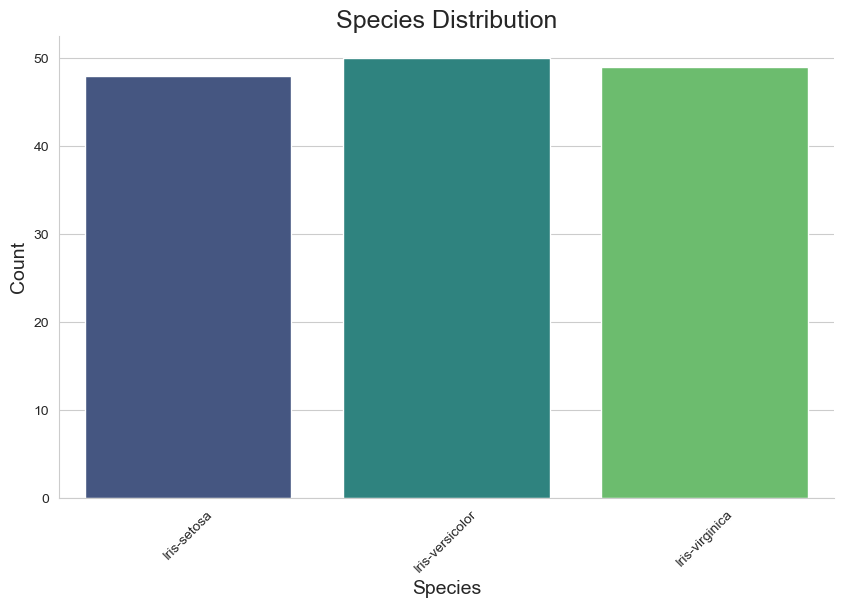

In [84]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['species'], palette="viridis")
plt.title("Species Distribution", fontsize=18)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
sns.despine()

# show the plot
plt.show()

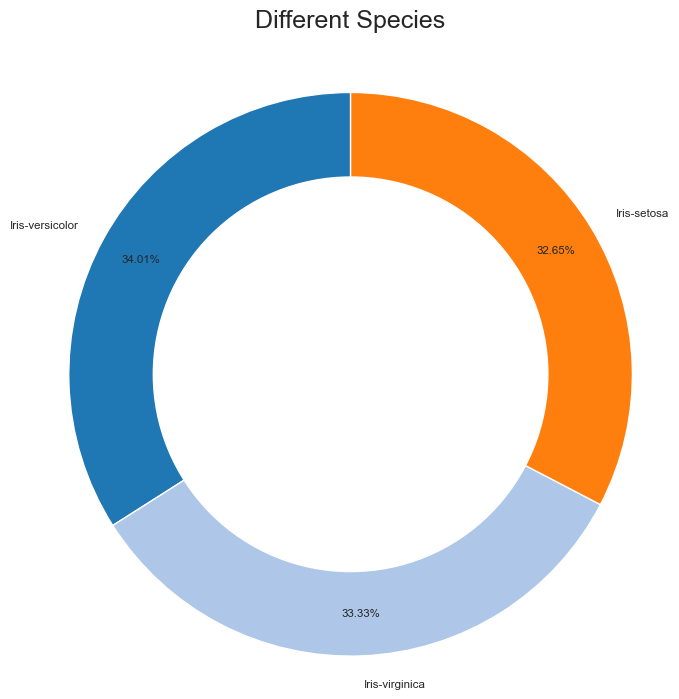

In [85]:
# create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['species'].value_counts(), 
        labels=df['species'].value_counts().index, 
        autopct="%1.2f%%", 
        startangle=90, 
        colors=plt.cm.tab20(range(len(df['species'].value_counts()))), 
        textprops={'size': 'smaller'}, 
        pctdistance=0.85, 
        labeldistance=1.1)

# draw a white circle at the center
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

plt.title("Different Species", fontsize=18, y=1.05)

plt.show()

C:\Users\SHIVAM ADHAU\AppData\Local\Temp\ipykernel_6548\2655650515.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="species", y="sepal_length", data=df,


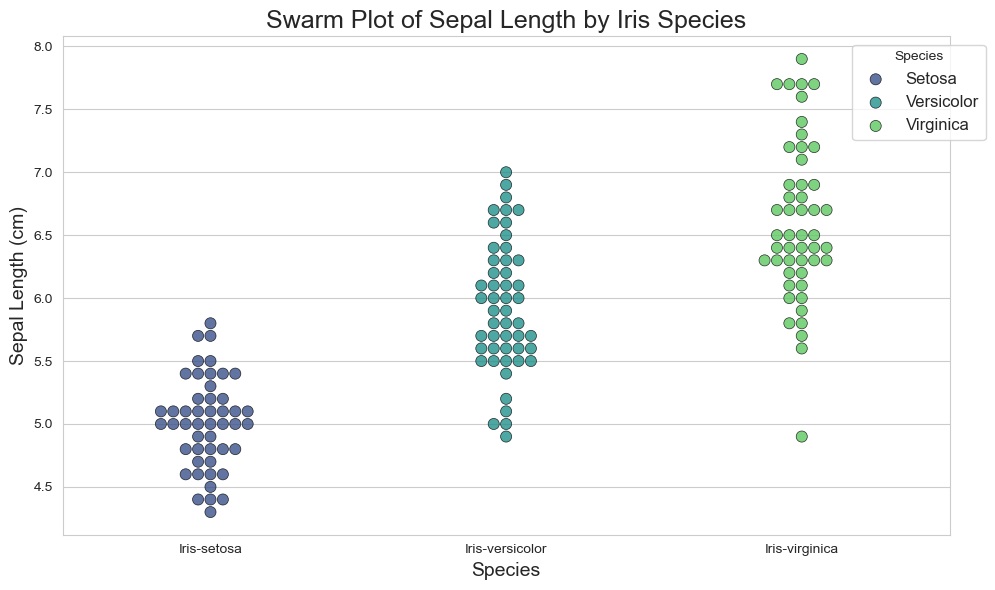

In [86]:
# create a swarm plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.swarmplot(x="species", y="sepal_length", data=df, 
              palette="viridis", size=8, alpha=0.8, 
              edgecolor="black", linewidth=0.5)

# add a title and labels
plt.title("Swarm Plot of Sepal Length by Iris Species", fontsize=18)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Sepal Length (cm)", fontsize=14)

# add a legend
plt.legend(title="Species", labels=['Setosa', 'Versicolor', 'Virginica'], loc="upper right", bbox_to_anchor=(1.05, 1), fontsize=12)

# show the plot
plt.tight_layout()
plt.show()

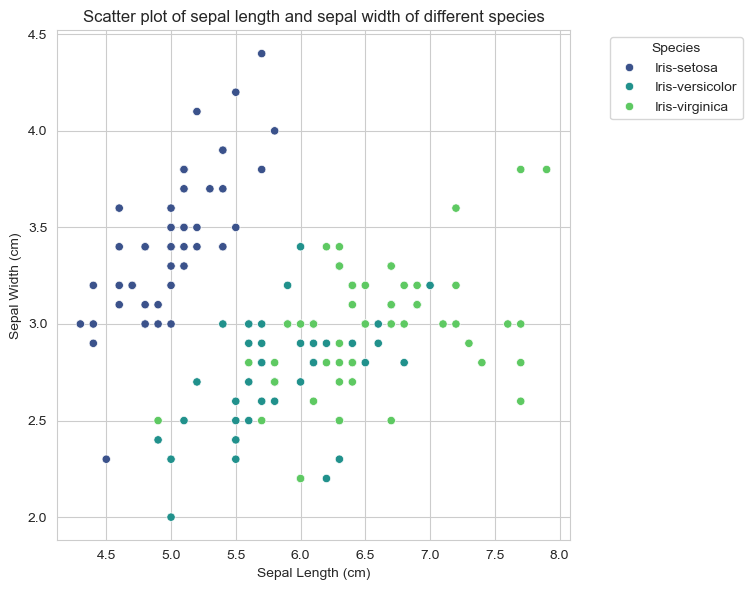

In [87]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df, palette='viridis')

# Customize the plot
plt.title("Scatter plot of sepal length and sepal width of different species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title="Species", loc='upper right', bbox_to_anchor=(1.35, 1))
plt.tight_layout()

# Show the plot
plt.show()

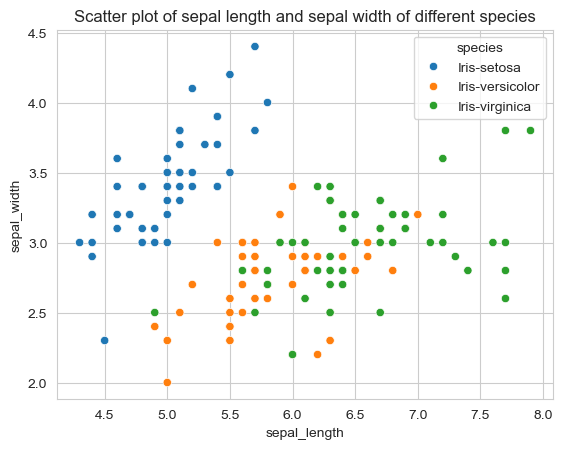

In [88]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.title("Scatter plot of sepal length and sepal width of different species")
plt.show()

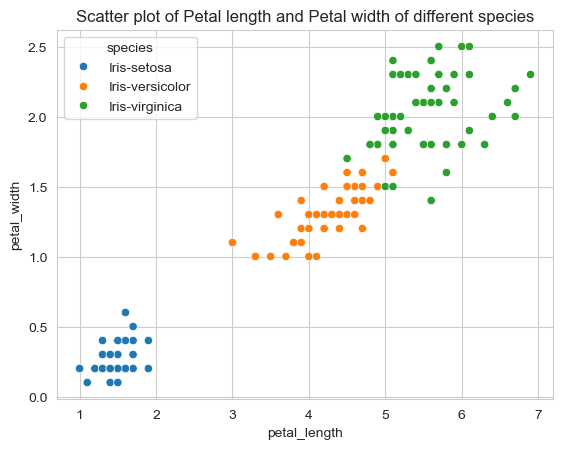

In [89]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df)
plt.title("Scatter plot of Petal length and Petal width of different species")
plt.show()

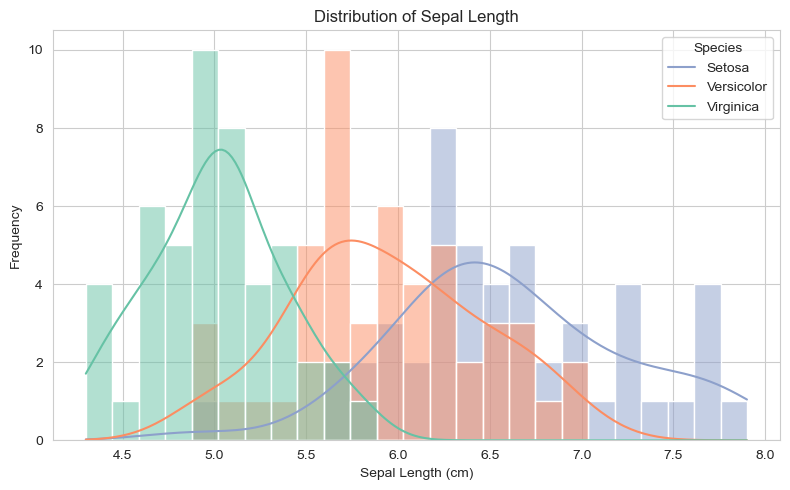

In [90]:
plt.figure(figsize=(8, 5), dpi=100)

sns.histplot(data=df, x='sepal_length', bins=25, kde=True, hue='species', palette='Set2')

plt.title("Distribution of Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")

plt.legend(title="Species", labels=['Setosa', 'Versicolor', 'Virginica'])

plt.tight_layout()
plt.show()

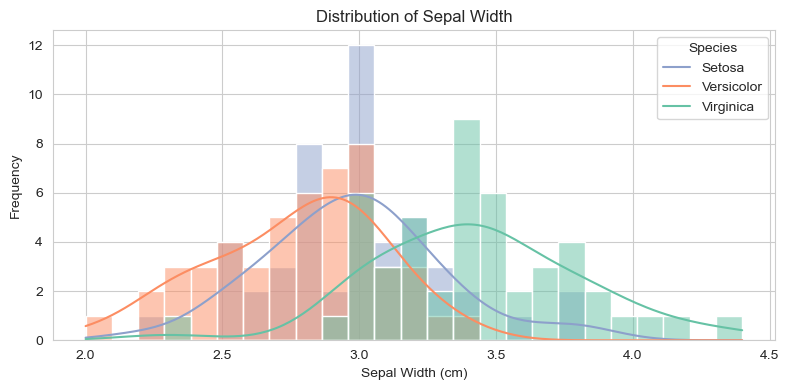

In [91]:
plt.figure(figsize=(8, 4), dpi=100)

sns.histplot(data=df, x='sepal_width', bins=25, kde=True, hue='species', palette='Set2')

plt.title("Distribution of Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")

plt.legend(title="Species", labels=['Setosa', 'Versicolor', 'Virginica'])

plt.tight_layout()
plt.show()

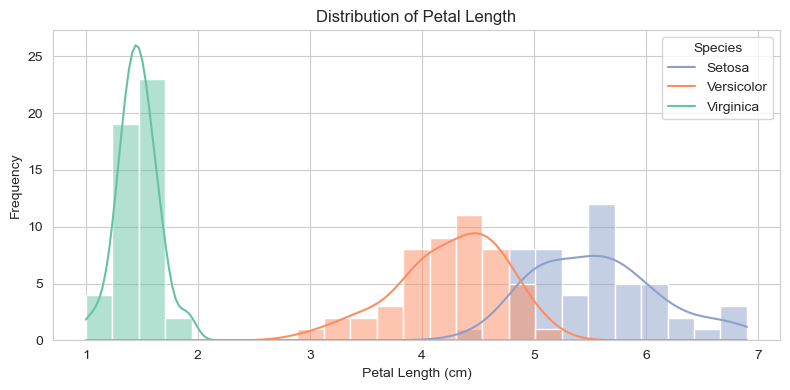

In [92]:
plt.figure(figsize=(8, 4), dpi=100)

sns.histplot(data=df, x='petal_length', bins=25, kde=True, hue='species', palette='Set2')

plt.title("Distribution of Petal Length")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")

plt.legend(title="Species", labels=['Setosa', 'Versicolor', 'Virginica'])

plt.tight_layout()
plt.show()

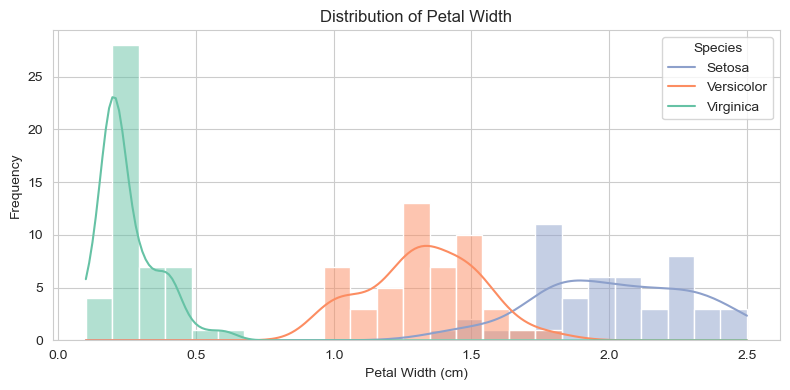

In [93]:
plt.figure(figsize=(8, 4), dpi=100)

sns.histplot(data=df, x='petal_width', bins=25, kde=True, hue='species', palette='Set2')

plt.title("Distribution of Petal Width")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Frequency")

plt.legend(title="Species", labels=['Setosa', 'Versicolor', 'Virginica'], loc='upper right')

plt.tight_layout()
plt.show()

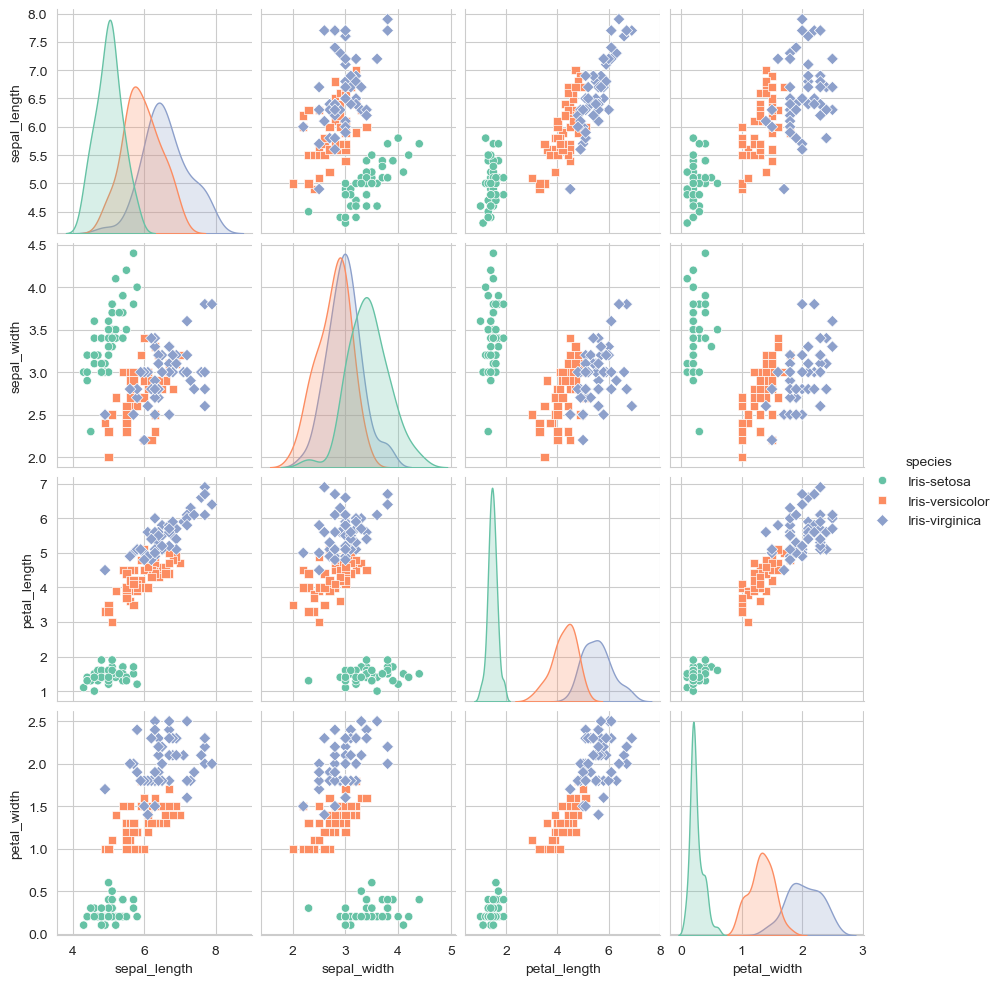

In [94]:
sns.pairplot(df, hue='species', palette='Set2', markers=['o', 's', 'D'])

plt.gcf().set_size_inches(10, 10)

plt.show()

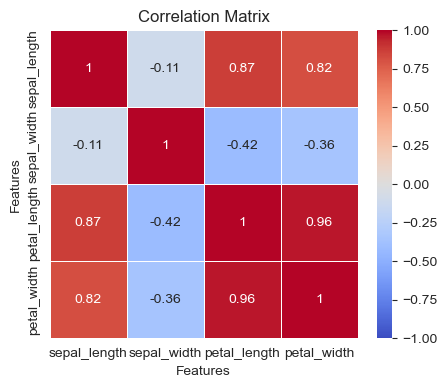

In [95]:
corr = df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(5, 4))

sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)

ax.set_title("Correlation Matrix")
ax.set_xlabel("Features")
ax.set_ylabel("Features")

plt.show()

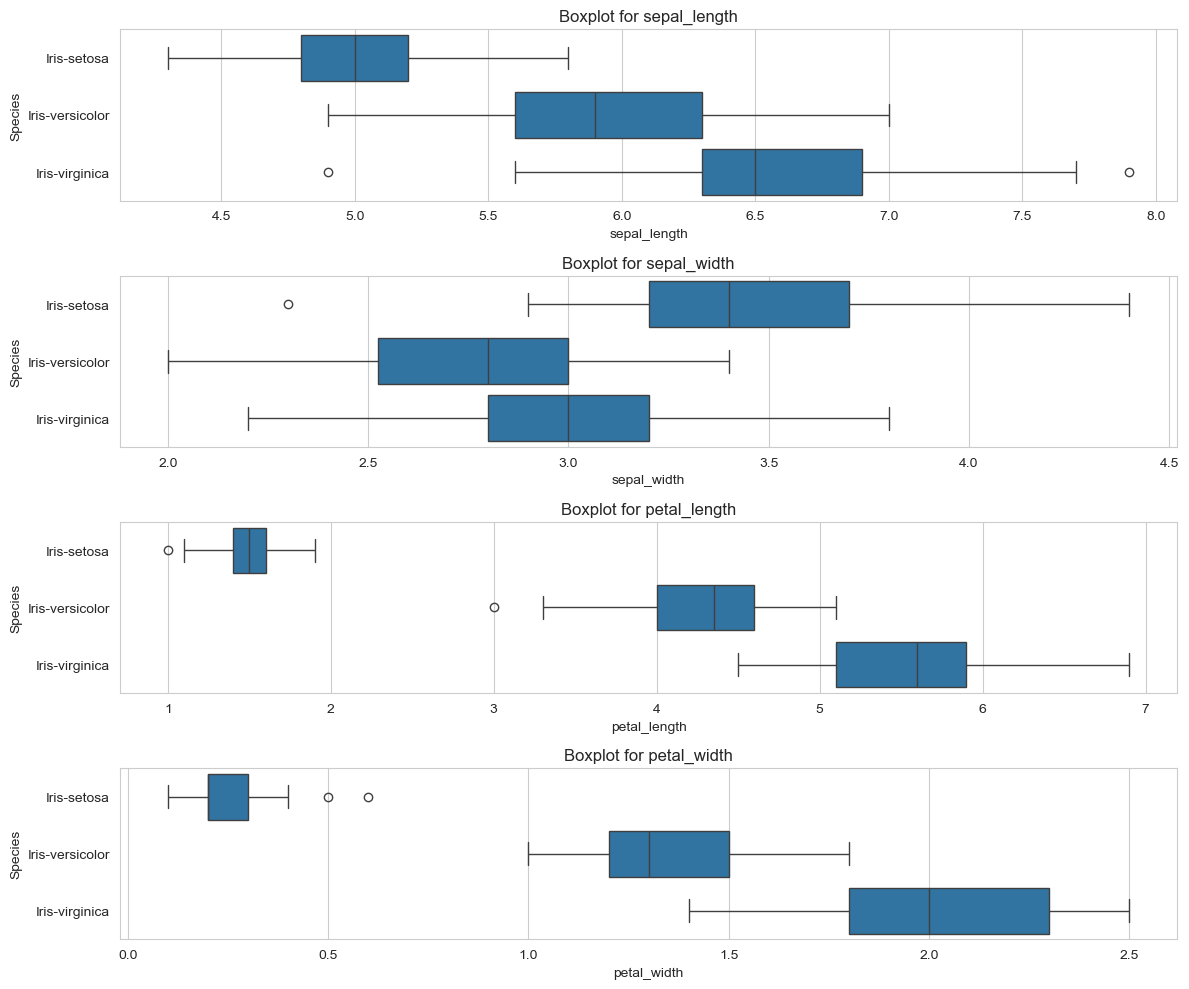

In [96]:
numerical_data = [col for col in df.columns if df.dtypes[col] != 'object']

fig, axs = plt.subplots(nrows=len(numerical_data), ncols=1, figsize=(12, 10))

for i, ax in enumerate(axs):
    sns.boxplot(x=numerical_data[i], y='species', data=df, ax=ax)
    ax.set_title(f'Boxplot for {numerical_data[i]}')
    ax.set_xlabel(numerical_data[i])
    ax.set_ylabel('Species')

plt.tight_layout()
plt.show()

In [97]:
numerical_data = [col for col in df.columns if df.dtypes[col]!='object']
plt.figure(figsize=(12, 10))
for i in range(len(numerical_data)):
    plt.subplot(len(numerical_data),1, i + 1)  
    sns.boxplot(x=numerical_data[i], y='species', data=df)
    plt.title(f'Boxplot for {numerical_data[i]}')
plt.tight_layout()  
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
x = df.drop('species',axis=1)
y = df['species']

In [ ]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 147, dtype: int32

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, classification_report 
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy score(Logistic Regression):",accuracy*100)

Accuracy score(Logistic Regression): 95.55555555555556


In [ ]:
cls_report = classification_report(y_pred, y_test)
print('classification report for our model(Logistic Regression) is:\n', cls_report)

classification report for our model(Logistic Regression) is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(x_train,y_train)
y_pred_dc = dc.predict(x_test)
accuracy_dc = accuracy_score(y_pred_dc, y_test)
print("Accuracy score(Decission Tree classifier):",accuracy_dc*100)
cls_report_dc = classification_report(y_pred_dc, y_test)
print('classification report for our model(Decision tree classifier) is:\n', cls_report_dc)

Accuracy score(Decission Tree classifier): 93.33333333333333
classification report for our model(Decision tree classifier) is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.88      0.91        17
           2       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



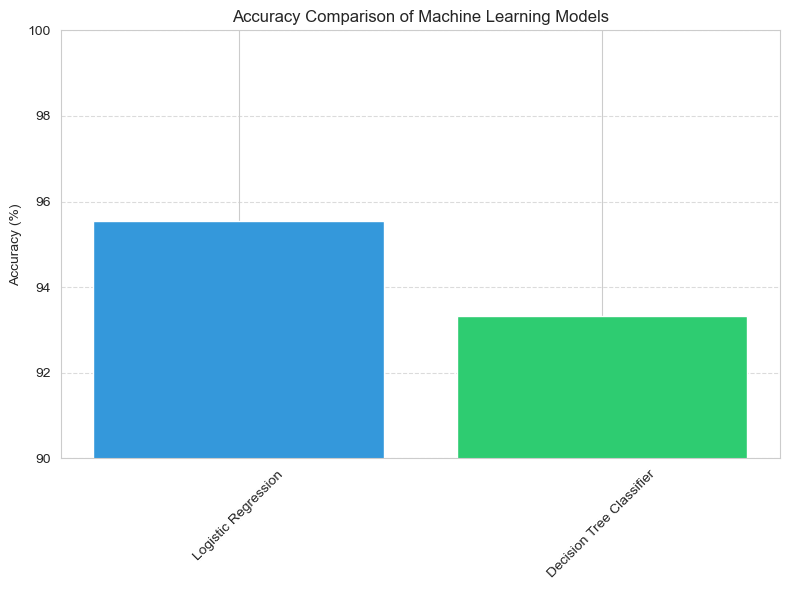

In [ ]:

models = ['Logistic Regression', 'Decision Tree Classifier']

acc = [accuracy*100, accuracy_dc*100]

plt.figure(figsize=(8, 6))
plt.bar(models, acc, color=['#3498db', '#2ecc71'])
plt.ylim(90, 100)  
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Machine Learning Models')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
